# Gemini Staging 2017 - Betatron Properties

This Jupyter notebook is used to estimate the betatron properties in the Gemini Staging experiment planned for October 2017.

### Import libraries

In [42]:
import math
import numpy as np
from numpy import pi, sin, cos
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

### Basic Constants

In [43]:
hbar = 6.5828110*10**(-16) # hbar in units of eV s
clight = 2.998*10**8       # speed of light in units of m/s

### Basic Betatron Equations

In [44]:
def plasmafreq(ne): # calculates plasma frequency, ne in units of cm^-3 
    return math.sqrt(3182.607*ne*10**6) # coversion in units of rad/s
    
    
def betatronfreq(ne, gamma): # calculates the betatron frequency, ne in units of cm^-3
    return plasmafreq(ne)/math.sqrt(2*gamma) # return in rad/s


def ecritdiv(ne, gamma, divergencemax): # calculates critical energy, ne in cm^-3, divergencemax in mrad
    return (3*math.sqrt(2)/4)*hbar*plasmafreq(ne)*gamma**(5/2)*divergencemax*10**(-3) # return in eV


def ecrit(ne, gamma, rbeta): # calculates the critical energy, ne in cm^-3, rbeta in microns
    return (3/4)*hbar*plasmafreq(ne)**2*gamma**2/clight*rbeta*10**(-6) # return in eV


def divergence(ne, gamma, rbeta): # calculates maximum divergence, ne in cm^-3, rbeta in microns
    return plasmafreq(ne)*rbeta*10**(-3)/(clight*math.sqrt(2*gamma)) # return in mrad

### Other equations

In [45]:
def laserfreq(wavelength): # calculates the laser frequency omega from wavelength in microns
    return 2*pi*clight/(wavelength*10**(-6)) # return in rad/s

def rbubble(a0,ne): # calculates the bubble or blowout radius for matched spot-size
    return 10**6*2*math.sqrt(a0)*clight/plasmafreq(ne) # return in microns

def Ldephasing(a0,ne): # calculates the dephasing length in absence of betatron oscillations
    return 2*10**(-3)*laserfreq(0.8)**2/plasmafreq(ne)**2*rbubble(a0,ne) # return in mm

def Ldephasing_beta(a0,ne,gamma,rbeta): # calculates the dephasing length with betatron oscillations
    return Ldephasing(a0,ne)*(1-(laserfreq(0.8)*rbeta*10**(-6)/clight)**2/(4*gamma))**(-1)

def Ldephasing_betaDelta(ne,gamma,rbeta1,rbeta2): # calculates the relative dephasing gain from rbeta1 to rbeta2, only holds for k^2rbeta^2/4gamma << 1
    return (laserfreq(0.8)/clight)**2/(4*gamma)*(rbeta2**2-rbeta1**2)*(10**(-6))**2 # in units of Ldephasing

### Parameters: Stage 1

Assumed parameters:

In [46]:
gamma1 = 3000        # assuming approx 1.5 GeV
density1 = 2*10**18  # in cm^-3
rbeta1 = 0.5           # in microns

Derived parameters:

In [47]:
omegap1 = plasmafreq(density1)
ecrit1 = ecrit(density1,gamma1,rbeta1)
divergence1 = divergence(density1,gamma1,rbeta1)

In [48]:
print("Plasma frequency = " "%.3e 1/s" % omegap1)
print("Critical Energy = " "%.3e eV" % ecrit1)
print("Maximum Divergence = " "%.3e mrad" % divergence1)

Plasma frequency = 7.978e+13 1/s
Critical Energy = 4.717e+04 eV
Maximum Divergence = 1.718e+00 mrad


### Parameters: Stage 2

Assumed parameters:

In [49]:
gamma2 = 6000        # assuming approx 3 GeV
density2 = 2*10**18  # in cm^-3
rbeta2 = 5           # in microns

Derived parameters:

In [50]:
omegap2 = plasmafreq(density2)
ecrit2 = ecrit(density2,gamma2,rbeta2)
divergence2 = divergence(density2,gamma2,rbeta2)

In [51]:
print("Plasma frequency = " "%.3e 1/s" % omegap2)
print("Critical Energy = " "%.3e eV" % ecrit2)
print("Maximum Divergence = " "%.3e mrad" % divergence2)

Plasma frequency = 7.978e+13 1/s
Critical Energy = 1.887e+06 eV
Maximum Divergence = 1.215e+01 mrad


### Estimating the parameters in stage 2 using extra drift in between

Here using a result from KT Phuoc's paper 'Betatron radiation from density tailored plasmas'.

In the first stage the electrons oscillate with a certain amplitude. As soon as they leave the plasma the fields disappear and the motion is approximately tangential over the drift.
If the electrons satisfy the trapping condition for the second stage (L < gamma/abeta rb), where rb is the radius of the bubble. 
Then the new amplitude is reaching a value, basically the ratio of longitudinal to transversal momentum.

x1 = abeta/gamma L.

In the horizontal plane (plane of oscillation), the divergence is proportional to abeta/gamma, in the vertical plane it is just 1/gamma. Abeta is apparently the same as the undulator strength parameter sometimes referred to as K.

That means K = abeta = gamma theta.

Assume same parameters for stage 1 as in the previous section.

Which are:

In [52]:
print("Plasma frequency = " "%.3e 1/s" % omegap1)
print("Critical Energy = " "%.3e eV" % ecrit1)
print("Maximum Divergence = " "%.3e mrad" % divergence1)
print("Betatron radius = " "%.3e microns" % rbeta1)

Plasma frequency = 7.978e+13 1/s
Critical Energy = 4.717e+04 eV
Maximum Divergence = 1.718e+00 mrad
Betatron radius = 5.000e-01 microns


The length between the two stages be (between 5-20 mm):

In [62]:
d_stages = 8 # in mm

The parameters for the second laser pulse are:

In [63]:
Fnumber2 = 50 # f50 focusing
waist2 = Fnumber2*2*0.8/pi # spot size in microns
print("Spot size = " "%.3e microns" % waist2)
I02 = 10**(-4)*10**15*15/(0.5*45*pi*(waist2*10**(-6))**2)
print("Peak intensity = " "%.3e W/cm^2" % I02)
a02 = math.sqrt(I02*0.8**2/(1.37*10**18))
print("a0 = " "%.3e" % a02)

Spot size = 2.546e+01 microns
Peak intensity = 3.272e+19 W/cm^2
a0 = 3.910e+00


In [64]:
rbubble2 = rbubble(a02,density2)
print("Bubble radius = " "%.3e microns" % rbubble2)

Bubble radius = 1.486e+01 microns


Giving a new amplitude of 

In [65]:
rbeta2_drift = divergence1*d_stages
print("New betatron radius = " "%.3e microns" % rbeta2_drift)

New betatron radius = 1.374e+01 microns


Is this smaller than the bubble radius (i.e. can it be trapped?):

In [66]:
if rbeta2_drift <= rbubble2:
    print("New amplitude is smaller than bubble size. Electrons can be trapped!")
else:
    print("New amplitude is larger than bubble size. Electrons can NOT be trapped!")

New amplitude is smaller than bubble size. Electrons can be trapped!


With a new amplitude of this value, the parameters for the second stage would be (assuming same density and energy):

In [67]:
ecrit2_drift = ecrit(density2,gamma2,rbeta2_drift)
divergence2_drift = divergence(density2,gamma2,rbeta2_drift)
print("Plasma frequency = " "%.3e 1/s" % omegap2)
print("Critical Energy = " "%.3e eV" % ecrit2_drift)
print("Maximum Divergence = " "%.3e mrad" % divergence2_drift)

Plasma frequency = 7.978e+13 1/s
Critical Energy = 5.186e+06 eV
Maximum Divergence = 3.338e+01 mrad


Some plots for visualisation:

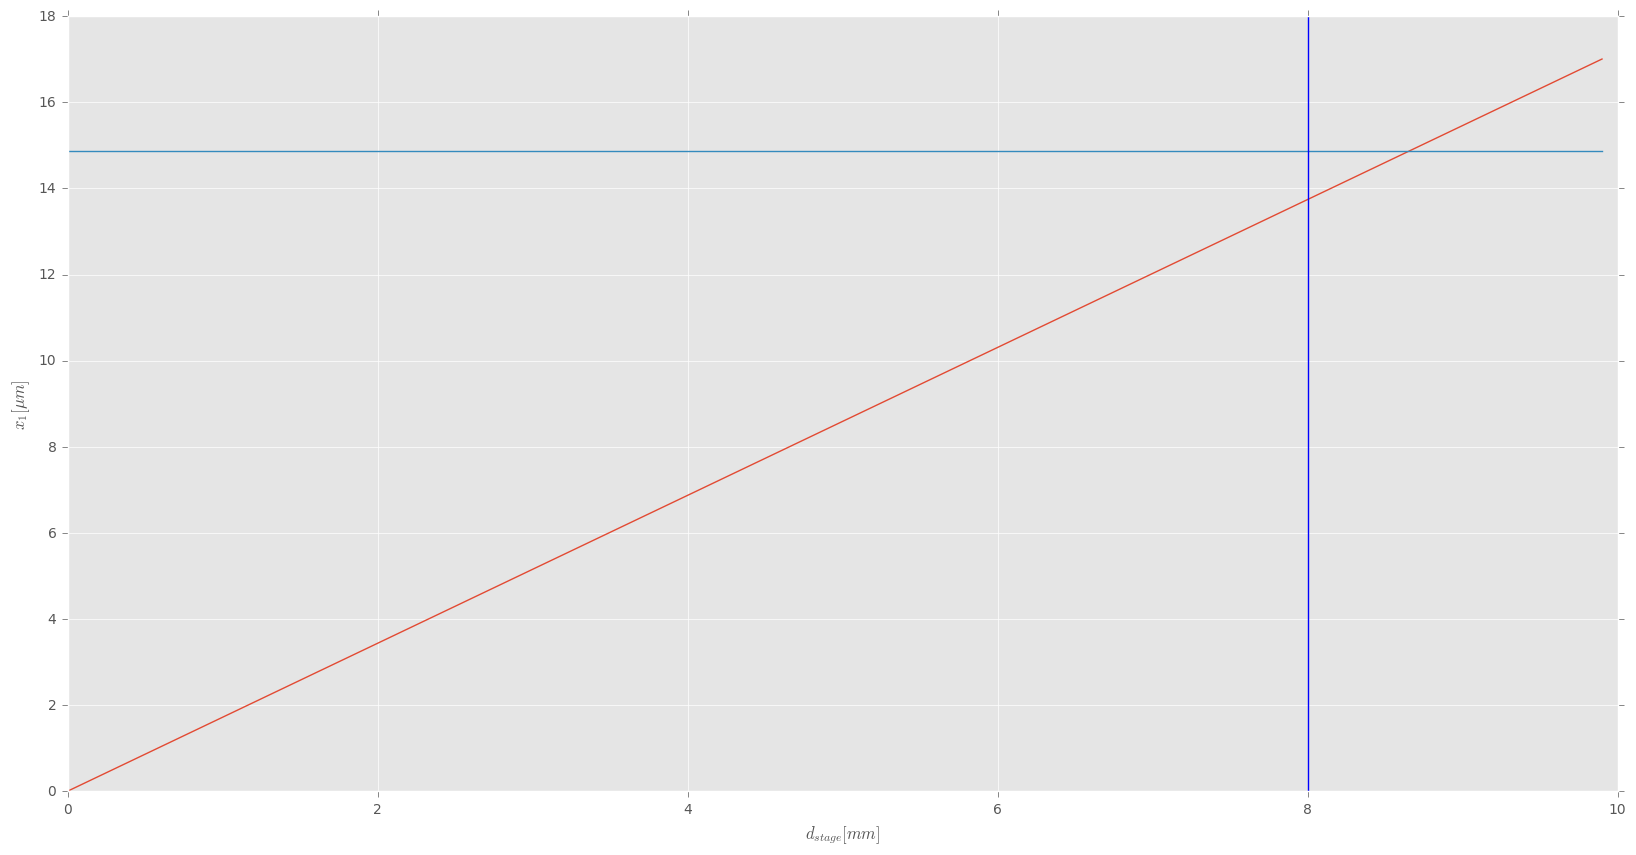

In [68]:
d_stage_array = np.arange(0,10,0.1)

f,ax=plt.subplots(figsize=(20,10))

plt.plot(d_stage_array,divergence1*d_stage_array)
plt.plot(d_stage_array,rbubble2*np.ones(np.shape(d_stage_array)))
plt.axvline(d_stages)
plt.ylabel('$x_1 [\mu m]$')
plt.xlabel('$d_{stage} [mm]$')

plt.style.use("ggplot")

plt.show()

#### Dephasing Lengths

The increased betatron oscillations reduce the axial velocity, hence increasing the dephasing length.

The dephasing lengths:

In [69]:
print("Old betatron radius = " "%.3e microns" % rbeta2)
print("New betatron radius = " "%.3e microns" % rbeta2_drift)

Ldephasing2 = Ldephasing(a02,density2) # dephasing length without oscillations
Ldephasing2beta = Ldephasing_beta(a02,density2,gamma2,rbeta2) # dephasing length with rbeta2 (no drift)
Ldephasing2beta_drift = Ldephasing_beta(a02,density2,gamma2,rbeta2_drift) # dephasing length with rbeta2_drift (with drift)
Ldephasing2betaToNobeta_normalised = (Ldephasing2beta-Ldephasing2)/Ldephasing2 # gain in length in units of Ldephasing
Ldephasing2_DeltaBeta2Beta2DriftEqn = Ldephasing_betaDelta(density2,gamma2,rbeta2,rbeta2_drift) # gain in length drift to no-drift
Ldephasing2_DeltaBeta2Beta2Drift = (Ldephasing2beta_drift-Ldephasing2beta)/Ldephasing2
print("Dephasing length = " "%.3e mm" % Ldephasing2)
print("Dephasing length with betatron = " "%.3e mm" % Ldephasing2beta)

print("Dephasing length with betatron drift = " "%.3e mm" % Ldephasing2beta_drift)
print("Dephasing length beta - dephasing length/dephasing length = " "%.3e" % Ldephasing2betaToNobeta_normalised)
print("Dephasing length beta 2 drift- dephasing length beta 2/dephasing length = " "%.3e" % Ldephasing2_DeltaBeta2Beta2Drift)

Old betatron radius = 5.000e+00 microns
New betatron radius = 1.374e+01 microns
Dephasing length = 2.589e+01 mm
Dephasing length with betatron = 2.767e+01 mm
Dephasing length with betatron drift = 5.031e+01 mm
Dephasing length beta - dephasing length/dephasing length = 6.867e-02
Dephasing length beta 2 drift- dephasing length beta 2/dephasing length = 8.745e-01


Let us plot the dephasing lengths resulting from values of rbeta

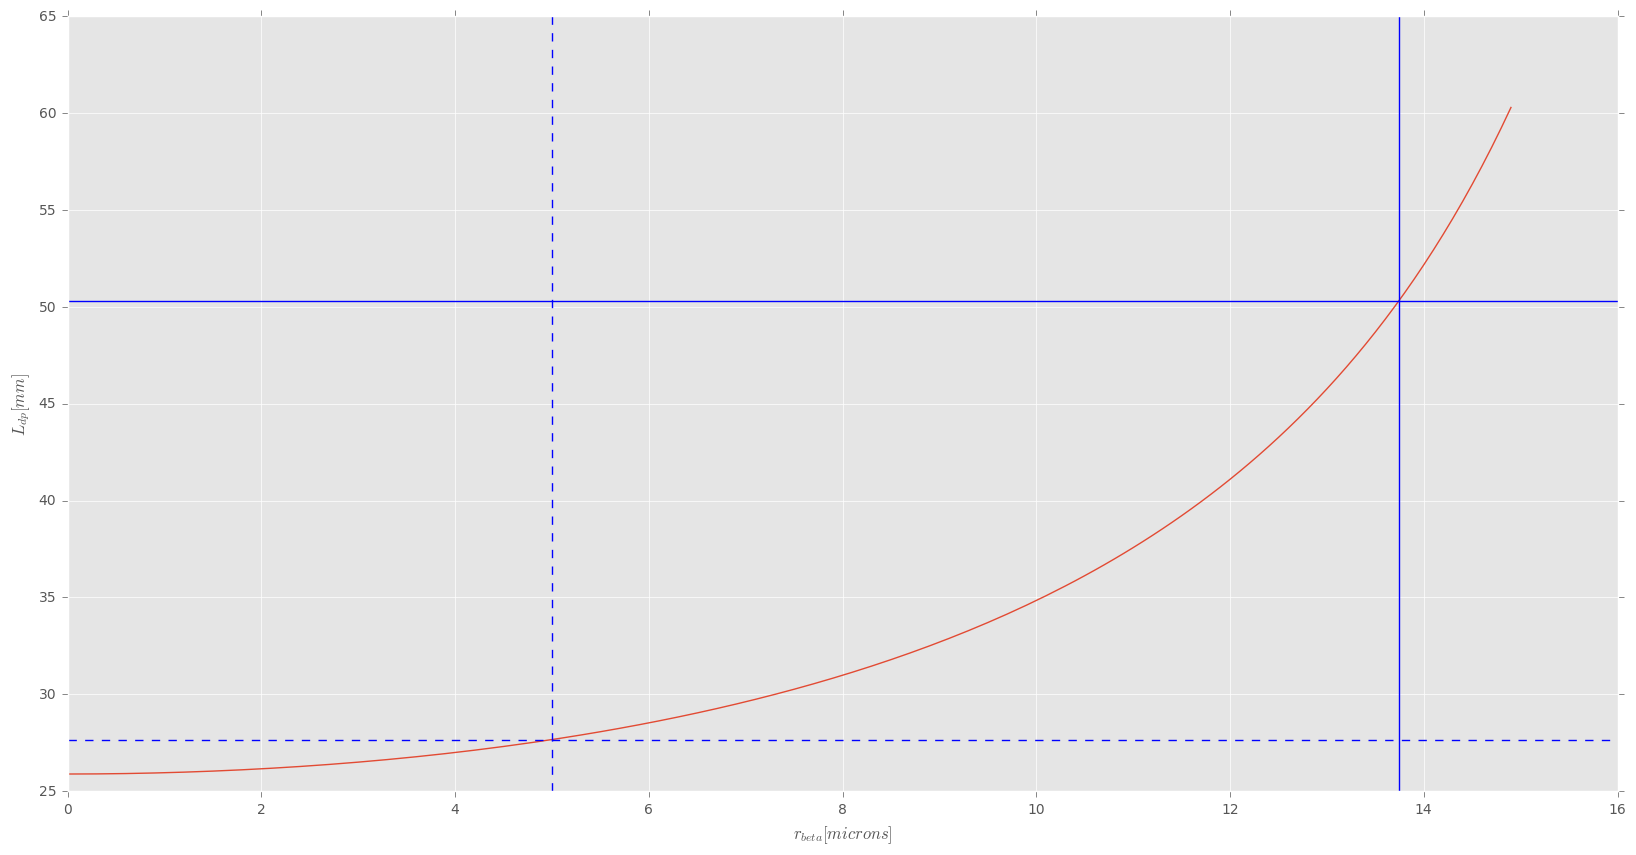

In [70]:
rbeta_array = np.arange(0,15,0.1)
Ldephasing_array = Ldephasing_beta(a02,density2,gamma2,rbeta_array)

f,ax=plt.subplots(figsize=(20,10))

plt.plot(rbeta_array,Ldephasing_array)
plt.axvline(rbeta2_drift)
plt.axvline(rbeta2, linestyle = '--')
plt.axhline(Ldephasing2beta, linestyle = '--')
plt.axhline(Ldephasing2beta_drift)
plt.ylabel('$L_{dp} [mm]$')
plt.xlabel('$r_{beta} [microns]$')

plt.style.use("ggplot")

plt.show()
